In [15]:
%matplotlib inline

from emoji import demojize
from instalooter.looters import HashtagLooter
from langdetect import detect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()


# read data from file, disregard errors, and drop duplicates
df = pd.read_csv('{}.txt'.format(HASHTAG),sep='; ',error_bad_lines=False)[['edge_media_to_caption']].drop_duplicates()

Skipping line 3: Expected 5 fields in line 3, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 20: Expected 5 fields in line 20, saw 7. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 80: Expected 5 fields in line 80, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97: Expected 5 fields in line 97, saw 11. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 176: Expected 5 fields in line 176, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 225: Expected 5 fields in line 225, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 268: Expected 5 fields in line 268, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimi

In [8]:
#empty list of hashtags
hashtag_list=[]

#iter for check
en_descr=0

#iterate over rows of descriptions from dataframe/csv
for r in df['edge_media_to_caption']:
    
    #check if english
    try: 
        if detect(r) == 'en':
            en_descr +=1
            #add hashtags from the strings from the description field to the list of hashtags
            for hashtag in set(tag.strip("#") for tag in r.split() if tag.startswith("#")):
                #add to list in lower case
                hashtag_list.append(hashtag.lower())
    except:
        continue
        


hashtag_list.sort()

# check

print('Number of rows in dataframe:\t{}'.format(len(df)))
print('Number of english captions:\t{}'.format(en_descr))
print('Total number of #hashtags used:\t{}'.format(len(hashtag_list)))
print('Number of unique #hashtags: \t{}'.format(len(set(hashtag_list))))

Number of rows in dataframe:	7408
Number of english captions:	3537
Total number of #hashtags used:	35680
Number of unique #hashtags: 	9645


In [16]:
hashtag_dict ={}

for string in hashtag_list:
    if string in hashtag_dict.keys():
        hashtag_dict[string] += 1
    else:
        hashtag_dict[string] = 1


# cut off limit for mentions for hashtags
occurences = 100

# empty list of the hashtags to delete from the dictionary
small_num_hashtags =[]


for key in hashtag_dict.keys():
    if hashtag_dict[key] <=occurences:
        small_num_hashtags.append(key)

#delete hashtags that did not make the cut as defined by the occurences variable 
for useless_hashtag in small_num_hashtags:
    try:
        hashtag_dict.pop(useless_hashtag,None)
    except KeyError:
        pass

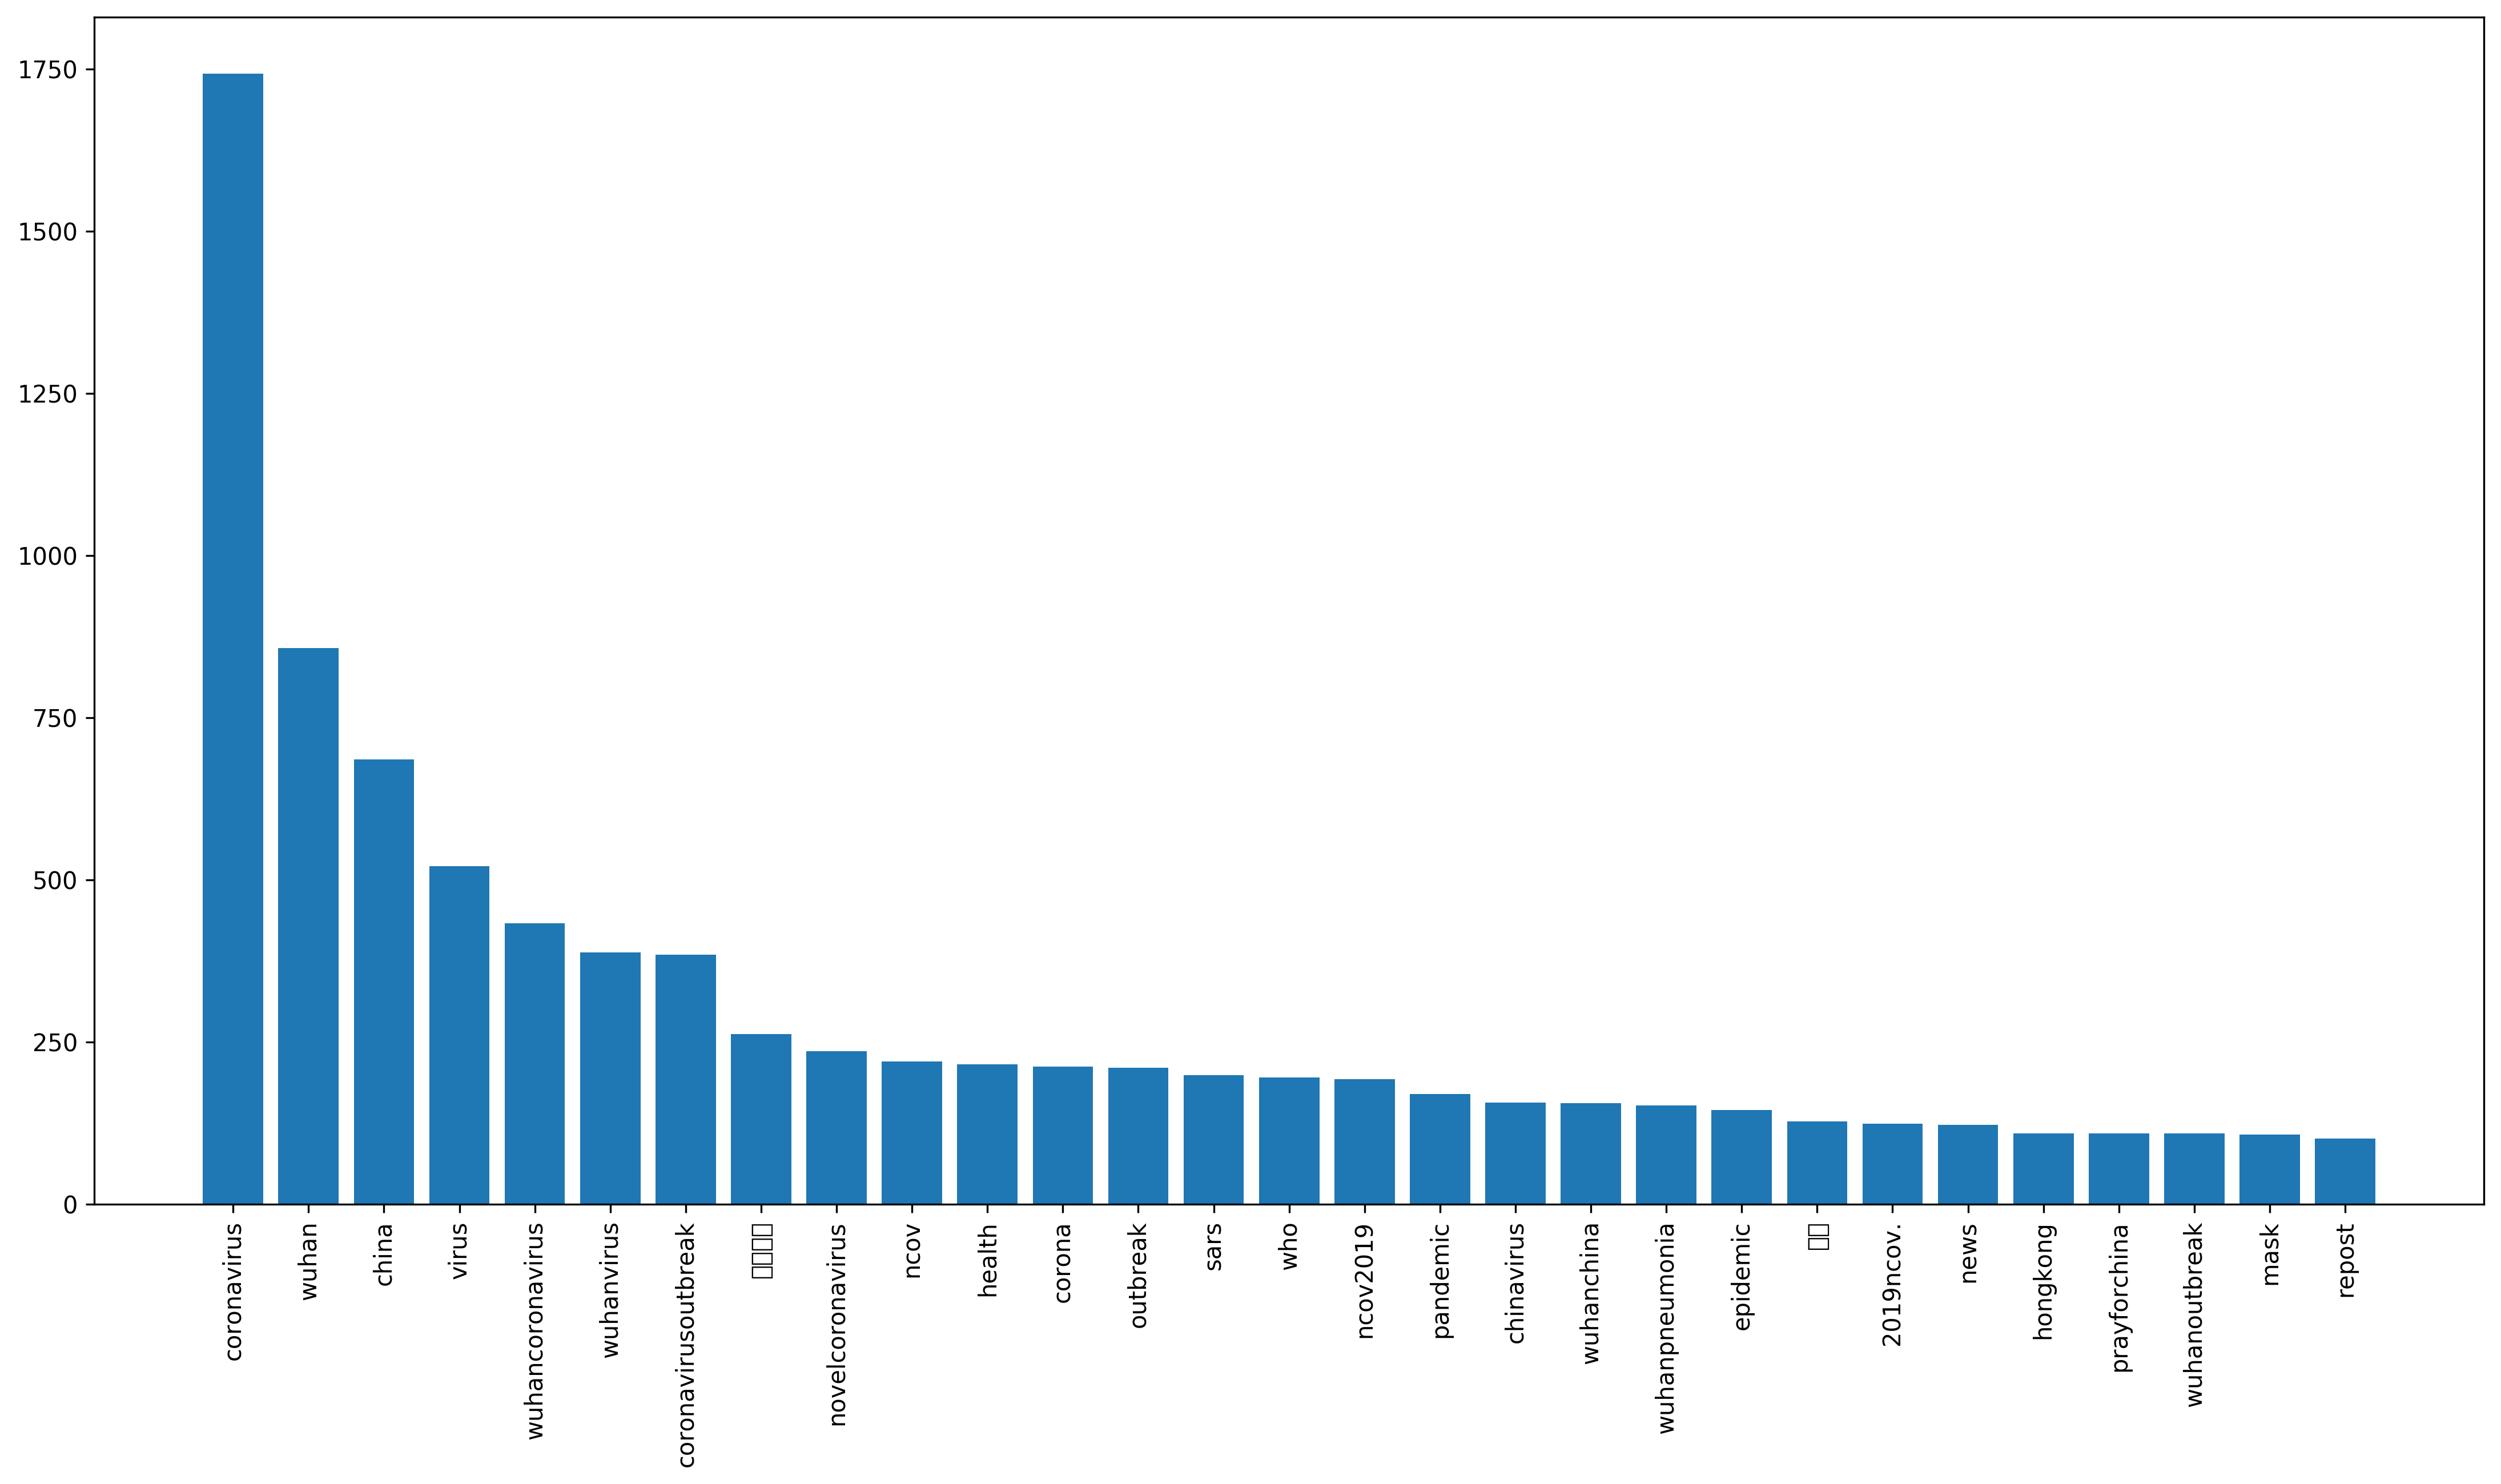

In [17]:
# delete the hashtag used for searching from the dict
hashtag_dict.pop(HASHTAG,None)

D = {k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1],reverse=True)}

plt.figure(num=None, figsize=(18, 9), dpi=300, facecolor='w', edgecolor='k')

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()),rotation=90)

plt.show()

In [23]:
D = {k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1],reverse=True)}

hashtag_df = pd.DataFrame(list(D.items()),columns = ['hashtag','mentions'])
hashtag_df['percent'] = round(hashtag_df['mentions']/int(en_descr),4)


# read the dataframe results as: 
print("The hashtag #{} was mentioned with the hashtag #{} in {}% off all English captions.".format(HASHTAG,hashtag_df['hashtag'][0],(100*(hashtag_df['percent'][0]))))

#Top 25 List
hashtag_df[:20]


The hashtag #2019ncov was mentioned with the hashtag #coronavirus in 49.28% off all English captions.


,hashtag,mentions,percent
0,coronavirus,1743,0.4928
1,wuhan,857,0.2423
2,china,686,0.1939
3,virus,521,0.1473
4,wuhancoronavirus,433,0.1224
5,wuhanvirus,388,0.1097
6,coronavirusoutbreak,385,0.1088
7,武漢肺炎,262,0.0741
8,novelcoronavirus,236,0.0667
9,ncov,220,0.0622


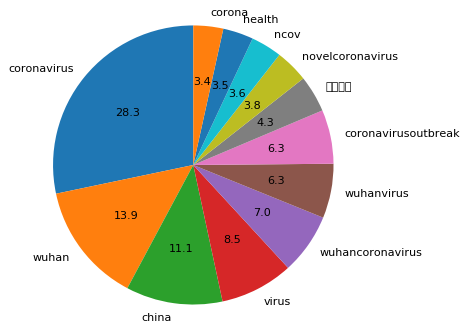

In [25]:
# Pie Chart Test - do not use, as the numbers are a bit misleading

limit_to_show = 12

pieLabels = list(hashtag_df['hashtag'][:limit_to_show])
populationShare = list(hashtag_df['mentions'][:limit_to_show])
figureObject, axesObject = plt.subplots(figsize=(5, 5),dpi=80, facecolor='w', edgecolor='k')


# Draw the pie chart
axesObject.pie(populationShare,
        labels=pieLabels,
        autopct='%1.1f',
        startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plt.show()